In [15]:
from keras.layers import Input, Conv1D, Flatten, Dropout, MaxPooling1D, Dense, BatchNormalization, Activation, UpSampling1D, Concatenate
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical   
from keras.models import Model
from keras import optimizers
import matplotlib.pyplot as plt
from pyts.image import GASF, GADF
import numpy as np
import h5py

hf = h5py.File('/home/kalvik/Documents/neuralwave/data/encoded_data.h5', 'r')
X_data = np.array(hf.get('X_data'))
y_data = np.array(hf.get('y_data'))
hf.close()

X_data = np.rollaxis(X_data, 1, 3)
X_data = np.reshape(X_data, (X_data.shape[0]*X_data.shape[1], X_data.shape[2], X_data.shape[3]))
X_data = X_data[:, 0]
#print(X_data.shape)
#X_data = np.reshape(X_data, (1000, 8000))
y_data = np.reshape(y_data, (-1))
y_data = to_categorical(y_data)
#X_data = np.expand_dims(X_data, axis=-1)
print(X_data.shape, y_data.shape)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

(1000, 4000) (1000, 25)


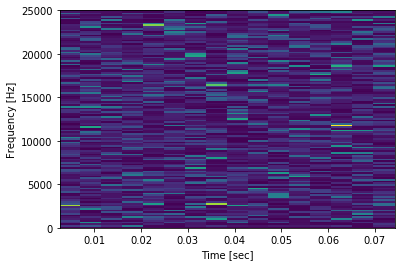

In [12]:
from scipy import signal
import matplotlib.pyplot as plt

for i in range(1):
    fs = 50e3
    N = 1
    f, t, Sxx = signal.spectrogram(X_train[i], fs)
    plt.pcolormesh(t, f, Sxx)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()

In [ ]:
inputs = Input(shape=(8000, 1))

x = Conv1D(16, 17, strides=1, padding='same')(inputs)
x = BatchNormalization(axis = -1)(x)
x = Activation('selu')(x)
x = MaxPooling1D(2)(x)

x = Conv1D(16, 11, strides=1, padding='same')(x)
x = BatchNormalization(axis = -1)(x)
x = Activation('selu')(x)
x = MaxPooling1D(2)(x)

x = Conv1D(16, 11, strides=1, padding='same')(x)
x = BatchNormalization(axis = -1)(x)
x = Activation('selu')(x)
x = MaxPooling1D(2)(x)

x = Conv1D(16, 7, strides=1, padding='same')(x)
x = BatchNormalization(axis = -1)(x)
x = Activation('selu')(x)
x = MaxPooling1D(2)(x)

x = Conv1D(16, 7, strides=1, padding='same')(x)
x = BatchNormalization(axis = -1)(x)
x = Activation('selu')(x)
x = MaxPooling1D(2)(x)

x = Flatten()(x)
x = Dense(25, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4), metrics=['acc'])
model.fit(x=X_train, y=y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)